R2 basic tutorial
=======

In this tutorial you will learn how to use the Python API of R2 (http://www.es.lancs.ac.uk/people/amb/Freeware/R2/R2.htm).
Start by importing the R2 master class from the API (Application Programming Interface).

1 Basics imports
---
Just import basic packages and the R2 API as a module (note : you will need to change the path for it, here we assume you launched the jupyter from inside the /examples/jupyter-notebook folder).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
sys.path.append((os.path.relpath('../../api'))) # add here the relative path of the API folder

from R2 import R2


2 Create R2 object, import data and plot pseudo section
----
The first step is to create an object out of the R2 class, let's call it ```k``` . This is the main object we are going to interact with. Then the second step is to read the data from a survey file. Here we choose a csv file from the Syscal Pro containing resistivity data only. Note then when importing the survey data, the object automatically search for reciprocal measurements and will delete the eventual dummy measurements (we assume normal and reciprocal are contained in the same file for now).

In [4]:
k = R2('../../api/test/') # create an R2 object in a working directory (can also set using k.setwd())
k.createSurvey('../../api/test/syscalFile.csv', ftype='Syscal') # read the survey file

36/344 reciprocal measurements NOT found.
0 measurements error > 20 %


../../api/Survey.py:162: RuntimeWarning: invalid value encountered in greater
  ibad = reciprocalErrRel > 0.2


We can plot the pseudosection and display errors based on reciprocal measurements.

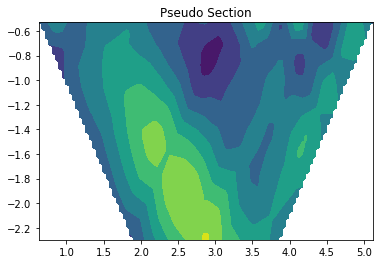

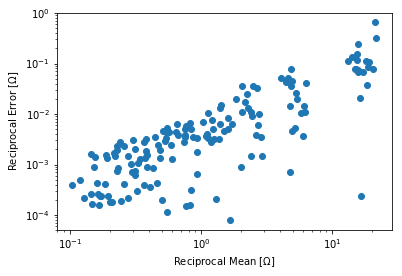

In [5]:
k.pseudo(contour=True)
k.plotError()

We can fit a simple linear model for the errors (```k.linfit()```) or using a linear mixed effect model (```k.lmefit()``` -> to be implemented soon):

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Simple linear log fit : 
	 offset = -2.352
	 slope = 1.067
R^2 = 0.9942


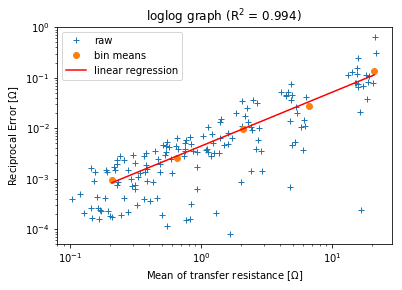

In [6]:
k.linfit(iplot=True)

4 Inversion using R2 wrapper
----

The inversion takes place in the specify working directory of the R2 object (```R2.setwd()```).
First we create the mesh (quadrilateral by default, but triangular will also be available). We can display the mesh using the ```showMesh()```method.

3.833333333333333
Mesh plotted in 0.38229 seconds


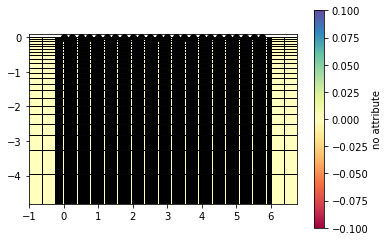

In [7]:
k.createMesh(typ='quad') # generate quadrilateral mesh
k.showMesh()

Then we invert the data. The routine to create the ```R2.in``` is automatically called with default parameters but we can modify them using ```k.param[nameOfParameters] = parameterValue```. The name of the parameter is the same as in the R2 manual.

In [8]:
k.param['data_type'] = 1 # using log of resistitive
k.invert(iplot=True) # this will do the inversion and plot the results at the end from the _res.dat file

FileNotFoundError: [Errno 2] No such file or directory: '/media/jkl/data/phd/tmp/r2gui/examples/jupyter-notebook/exe/R2.exe'

We can also plot the results from the vtk file:

no electrodes in mesh object to plot
Mesh plotted in 0.25681 seconds


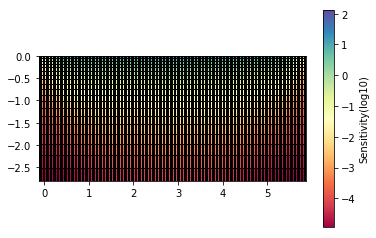

In [9]:
k.showResults()

In a nutshell
===

36/344 reciprocal measurements NOT found.
0 measurements error > 20 %
Using a quadrilateral mesh


../../api/Survey.py:162: RuntimeWarning: invalid value encountered in greater
  ibad = reciprocalErrRel > 0.2


FileNotFoundError: [Errno 2] No such file or directory: '/media/jkl/data/phd/tmp/r2gui/api/test/exe/R2.exe'

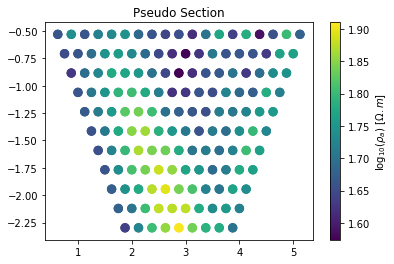

In [13]:
k = R2('../../api/test/') # create an R2 object in a working directory (can also set using k.setwd())
k.createSurvey('../../api/test/syscalFile.csv', ftype='Syscal') # read the survey file
k.pseudo() # plot pseudo section
k.invert(iplot=True) # does the inversion (generate quand mesh and use default R2.in settings)

In [10]:
print(k)

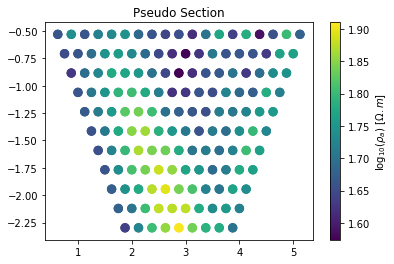

In [11]:
k.pseudo()

In [12]:
k.invert()

FileNotFoundError: [Errno 2] No such file or directory: '/media/jkl/data/phd/tmp/r2gui/api/test/exe/R2.exe'